<a href="https://colab.research.google.com/github/devssom/data-analysis/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

사용할 데이터
- 레모네이드 : https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/lemonade.csv
- 보스턴집값 : https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv
- 아이리스 : https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/iris.csv

# 1. 레모네이드 실습

## 1.1 데이터 준비
독립변수와 종속변수를 분리해내는 것

In [ ]:
import pandas as pd

path = "https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/lemonade.csv"
lemon = pd.read_csv(path)
lemon

,온도,판매량
0,20,40
1,21,42
2,22,44
3,23,46
4,24,48
5,25,50


In [ ]:
print(lemon.shape)

(6, 2)


In [ ]:
x = lemon[['온도']]
y = lemon[['판매량']]

print(x.shape, y.shape)

(6, 1) (6, 1)


In [ ]:
x

,온도
0,20
1,21
2,22
3,23
4,24
5,25


In [ ]:
y

,판매량
0,40
1,42
2,44
3,46
4,48
5,50


## 1.2. 모델 준비

In [ ]:
import tensorflow as tf

X = tf.keras.layers.Input(shape=[1])
Y = tf.keras.layers.Dense(1)(X)
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse')

## 1.3. 모델 학습(FIT)시키기

In [ ]:
model.fit(x, y, epochs=1000, verbose=0)
model.fit(x, y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 5ms/step - loss: 4.8699e-04
Epoch 2/10
1/1 [==============================] - 0s 8ms/step - loss: 4.8670e-04
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 4.8636e-04
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 4.8606e-04
Epoch 5/10
1/1 [==============================] - 0s 14ms/step - loss: 4.8572e-04
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 4.8534e-04
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 4.8496e-04
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 4.8460e-04
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 4.8432e-04
Epoch 10/10
1/1 [==============================] - 0s 4ms/step - loss: 4.8413e-04


##1.4. 모델 이용하기

In [ ]:
model.predict([[15]])

array([[30.090715]], dtype=float32)

In [ ]:
model.predict(x)

array([[40.038967],
       [42.028618],
       [44.01827 ],
       [46.00792 ],
       [47.99757 ],
       [49.98722 ]], dtype=float32)

In [ ]:
model.get_weights()

[array([[1.9896504]], dtype=float32), array([0.24596037], dtype=float32)]

In [ ]:
# 판매량 = 1.9896504 * 온도 + 0.24596037

판매량 = 1.9896504 * 22 + 0.24596037
판매량

44.018269169999996

# 2. 보스턴 집값 실습

## 2.1 데이터 준비
독립변수와 종속변수를 분리해내는 것

-> 보스턴 x_input, y_label 만들기 (종속변수: 'medv')

In [ ]:
import pandas as pd

path = "https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv"
boston = pd.read_csv(path)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
print(boston.shape)

(506, 14)


In [ ]:
x = boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
            'ptratio', 'b', 'lstat']]
y = boston[['medv']]

print(x.shape, y.shape)

(506, 13) (506, 1)


In [ ]:
X = tf.keras.layers.Input(shape=[13])
Y = tf.keras.layers.Dense(1)(X)
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse')

model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x, y, epochs=1000, verbose=0)
model.fit(x, y, epochs=10)

Epoch 1/10
16/16 [==============================] - 0s 1ms/step - loss: 24.3806
Epoch 2/10
16/16 [==============================] - 0s 1ms/step - loss: 24.9838
Epoch 3/10
16/16 [==============================] - 0s 1ms/step - loss: 24.8298
Epoch 4/10
16/16 [==============================] - 0s 1ms/step - loss: 24.9184
Epoch 5/10
16/16 [==============================] - 0s 1ms/step - loss: 24.9690
Epoch 6/10
16/16 [==============================] - 0s 1ms/step - loss: 24.8909
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 24.3178
Epoch 8/10
16/16 [==============================] - 0s 1ms/step - loss: 24.5775
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 24.0519
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 25.0438


In [ ]:
model.predict(x[:5])

array([[30.472223],
       [25.318722],
       [31.666788],
       [30.548607],
       [30.127996]], dtype=float32)

In [ ]:
model.predict(x[-5:])

array([[26.833881],
       [24.976582],
       [31.016485],
       [29.42258 ],
       [24.877672]], dtype=float32)

In [ ]:
model.get_weights()

[array([[-9.10145342e-02],
        [ 5.87902889e-02],
        [-4.18759547e-02],
        [ 2.97760129e+00],
        [ 1.22751486e+00],
        [ 5.02920628e+00],
        [-4.22755443e-03],
        [-9.85246599e-01],
        [ 1.72963232e-01],
        [-9.27913841e-03],
        [-3.02776366e-01],
        [ 1.54567575e-02],
        [-4.87947226e-01]], dtype=float32), array([3.5904973], dtype=float32)]

In [ ]:
# medv = -9.10145342e-02 * x1 + 5.87902889e-02 * x2 + -4.18759547e-02 * x3 + 2.97760129e+00 * x4 + 1.22751486e+00 * x5 + 5.02920628e+00 * x6 + -4.22755443e-03 * x7 + -9.85246599e-01 * x8 + 1.72963232e-01 * x9 + -9.27913841e-03 * x10 + -3.02776366e-01 * x11 + 1.54567575e-02 * x12 + -4.87947226e-01 * x13 + 3.5904973

# 3. 아이리스 품종 분류 실습

지금까지의 회귀 모델과 다른 분류 모델

## 3.1 데이터 준비
독립변수와 종속변수를 분리해내는 것

In [ ]:
import pandas as pd
# 데이터를 준비합니다. 

path = 'https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/iris.csv'
data = pd.read_csv(path)
data

,꽃잎길이,꽃잎폭,꽃받침길이,꽃받침폭,품종
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
print(data.shape)
print(data.columns)
print(data.info())

(150, 5)
Index(['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭', '품종'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   꽃잎길이    150 non-null    float64
 1   꽃잎폭     150 non-null    float64
 2   꽃받침길이   150 non-null    float64
 3   꽃받침폭    150 non-null    float64
 4   품종      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:
# 모든 범주형 변수를 원핫인코딩으로 수치형으로 변경해주기

onehot = pd.get_dummies(data)
onehot

,꽃잎길이,꽃잎폭,꽃받침길이,꽃받침폭,품종_setosa,품종_versicolor,품종_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [ ]:
# 독립변수와 종속변수 분리해주기

x = onehot[['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭']]
y = onehot[['품종_setosa', '품종_versicolor', '품종_virginica']]
print(x.shape, y.shape)

(150, 4) (150, 3)


In [ ]:
# 모델을 준비합니다. 
X = tf.keras.layers.Input(shape=[4])
Y = tf.keras.layers.Dense(3, activation='softmax')(X)
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x, y, epochs=1000, verbose=0)  # verbose가 없으면 한번 학습할 때마다 한 줄씩 출력하게됨
model.fit(x, y, epochs=10) # 위에서 1000번 학습하는 건 안보고 싶지만 그 다음에 10번 학습하는 것만 출력해서 보는 것

Epoch 1/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0689 - accuracy: 0.9800
Epoch 2/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0690 - accuracy: 0.9800
Epoch 3/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0689 - accuracy: 0.9800
Epoch 4/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0693 - accuracy: 0.9800
Epoch 5/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0688 - accuracy: 0.9800
Epoch 6/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0690 - accuracy: 0.9800
Epoch 7/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0689 - accuracy: 0.9800
Epoch 8/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0687 - accuracy: 0.9800
Epoch 9/10
5/5 [==============================] - 0s 2ms/step - loss: 0.0688 - accuracy: 0.9800
Epoch 10/10
5/5 [==============================] - 0s 3ms/step - loss: 0.0687 - accuracy: 0.9800


In [ ]:
model.predict(x[:5])

array([[9.99999881e-01, 1.56256590e-07, 4.03749702e-17],
       [9.99996662e-01, 3.38422865e-06, 6.03811756e-15],
       [9.99999285e-01, 7.20214643e-07, 7.44424488e-16],
       [9.99993443e-01, 6.60864134e-06, 2.29886656e-14],
       [9.99999881e-01, 1.05089555e-07, 2.46396144e-17]], dtype=float32)

In [ ]:
y[-5:]

,품종_setosa,품종_versicolor,품종_virginica
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1
149,0,0,1


In [ ]:
model.get_weights()

[array([[  2.143701  ,   0.58377826,  -1.4825209 ],
        [  6.9116473 ,   1.384849  ,  -1.6531408 ],
        [ -8.677012  ,  -1.1374265 ,   2.3782299 ],
        [-10.401354  ,  -3.2837942 ,   3.708508  ]], dtype=float32),
 array([ 3.9953582,  3.64406  , -3.5817835], dtype=float32)]

# 4. 진짜 인공신경망
보스턴 집값 예측 모델로 만들기

In [ ]:
import pandas as pd

path = "https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv"
boston = pd.read_csv(path)

x = boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
            'ptratio', 'b', 'lstat']]
y = boston[['medv']]

print(x.shape, y.shape)

(506, 13) (506, 1)


In [ ]:
# H를 히든 레이어로 넣어줌. 그리고 Y에 X 대신 H값을 넣어줌

X = tf.keras.layers.Input(shape=[13])
H = tf.keras.layers.Dense(5)(X)  
Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse')

model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 13)]              0         
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 70        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 6         
Total params: 76
Trainable params: 76
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 2000번 돌리니까 loss 값이 26까지 떨어짐

model.fit(x, y, epochs=1000, verbose=0)
model.fit(x, y, epochs=10)

Epoch 1/10
16/16 [==============================] - 0s 1ms/step - loss: 25.2623
Epoch 2/10
16/16 [==============================] - 0s 1ms/step - loss: 26.7107
Epoch 3/10
16/16 [==============================] - 0s 1ms/step - loss: 25.6053
Epoch 4/10
16/16 [==============================] - 0s 1ms/step - loss: 25.9584
Epoch 5/10
16/16 [==============================] - 0s 1ms/step - loss: 25.3978
Epoch 6/10
16/16 [==============================] - 0s 1ms/step - loss: 27.3780
Epoch 7/10
16/16 [==============================] - 0s 1ms/step - loss: 25.3586
Epoch 8/10
16/16 [==============================] - 0s 1ms/step - loss: 27.3952
Epoch 9/10
16/16 [==============================] - 0s 1ms/step - loss: 25.4271
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 27.3253


In [ ]:
# 맘에 안들어서 히든 레이어를 더 깊게 해줄거야

X = tf.keras.layers.Input(shape=[13])
H1 = tf.keras.layers.Dense(5)(X)
H2 = tf.keras.layers.Dense(4)(H1)
H3 = tf.keras.layers.Dense(2)(H2)  
Y = tf.keras.layers.Dense(1)(H3)
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse')

model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 13)]              0         
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 70        
_________________________________________________________________
dense_22 (Dense)             (None, 4)                 24        
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 3         
Total params: 107
Trainable params: 107
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 별로 안낮아지네..?
model.fit(x, y, epochs=1000, verbose=0)
model.fit(x, y, epochs=10)

Epoch 1/10
16/16 [==============================] - 0s 2ms/step - loss: 13.7694
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 14.0487
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 15.2907
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 14.0925
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 14.0068
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 14.1642
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 13.9561
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 14.7141
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 13.7488
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 13.9495


# 4. 텐서플로우의 이해

## 4.1 모델을 구성하는 여러가지 방법
1. Functional vs Sequential
2. parameter optimizer
3. activation layer 사용하는 것
4. layers, activations, optimzers, losses

In [ ]:
import pandas as pd

# 데이터를 준비합니다. 
path = "https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv"
data = pd.read_csv(path)
print(data.shape)
data.columns

x = data[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']]
y = data[['medv']]
print(x.shape, y.shape)

(506, 14)
(506, 13) (506, 1)


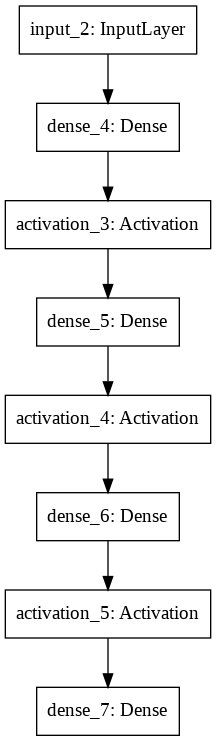

In [ ]:
import tensorflow as tf
# 모델을 준비합니다. 

# functional
X = tf.keras.layers.Input(shape=[13])
H = tf.keras.layers.Dense(5)(X)
H = tf.keras.layers.Activation(tf.keras.activations.swish)(H)
H = tf.keras.layers.Dense(3)(H)
H = tf.keras.layers.Activation('swish')(H)
H = tf.keras.layers.Dense(3)(H)
H = tf.keras.layers.Activation('swish')(H)
Y = tf.keras.layers.Dense(1)(H)

model = tf.keras.models.Model(X, Y)
model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss=tf.keras.losses.mse)

tf.keras.utils.plot_model(model)

In [ ]:
model.fit(x, y, epochs=10, batch_size=128, shuffle=True)

Epoch 1/10
4/4 [==============================] - 1s 4ms/step - loss: 379.5707
Epoch 2/10
4/4 [==============================] - 0s 4ms/step - loss: 308.1096
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 263.9320
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 228.1736
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 198.2362
Epoch 6/10
4/4 [==============================] - 0s 3ms/step - loss: 174.4886
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 156.2456
Epoch 8/10
4/4 [==============================] - 0s 4ms/step - loss: 142.7551
Epoch 9/10
4/4 [==============================] - 0s 4ms/step - loss: 132.6341
Epoch 10/10
4/4 [==============================] - 0s 3ms/step - loss: 124.9249


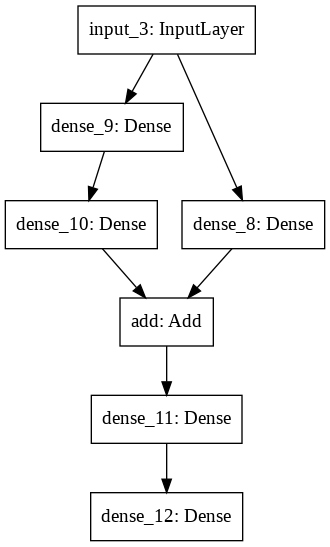

In [ ]:
import tensorflow as tf
# 모델을 준비합니다. 

# functional
X = tf.keras.layers.Input(shape=[13])
H1 = tf.keras.layers.Dense(5, activation='swish')(X)
H2 = tf.keras.layers.Dense(5, activation='swish')(X)
H3 = tf.keras.layers.Dense(5, activation='swish')(H2)
H4 = tf.keras.layers.Add()([H1, H3])
H = tf.keras.layers.Dense(3, activation='swish')(H4)
Y = tf.keras.layers.Dense(1)(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='mse')

tf.keras.utils.plot_model(model)

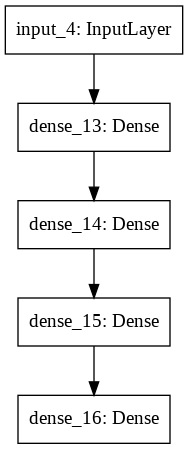

In [ ]:
# sequential
model_seq = tf.keras.models.Sequential()
model_seq.add(tf.keras.layers.Input(shape=[13]))
model_seq.add(tf.keras.layers.Dense(5, activation='swish'))
model_seq.add(tf.keras.layers.Dense(3, activation='swish'))
model_seq.add(tf.keras.layers.Dense(3, activation='swish'))
model_seq.add(tf.keras.layers.Dense(1))
model_seq.compile(loss='mse')

tf.keras.utils.plot_model(model_seq)

In [ ]:
model_seq.fit(x, y, epochs=100)

Epoch 1/100
16/16 [==============================] - 0s 2ms/step - loss: 30.1195
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 30.5391
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 30.7189
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 29.9748
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 29.4115
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 30.9536
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 29.0164
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 29.8245
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 29.9776
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 29.3812
Epoch 11/100
16/16 [==============================] - 0s 2ms/step - loss: 30.1335
Epoch 12/100
16/16 [==============================] - 0s 2ms/step - loss: 29.5614
Epoch 13/100
16/16 [=====

## 4.2 Train / Test / Validaion
- Train: 학습
- Test: 수능시험
- Validation: 모의고사

In [ ]:
import pandas as pd

# 데이터를 준비합니다. 
path = "https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/boston.csv"
data = pd.read_csv(path)
print(data.shape)
data.columns

num = int(506 * 0.7)
print(num)

train, test = data[:num], data[num:]
print(train.shape, test.shape)

(506, 14)
354
(354, 14) (152, 14)


In [ ]:
x_train = train[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']]
y_train = train[['medv']]
print(x_train.shape, y_train.shape)

x_test = test[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']]
y_test = test[['medv']]
print(x_test.shape, y_test.shape)

(354, 13) (354, 1)
(152, 13) (152, 1)


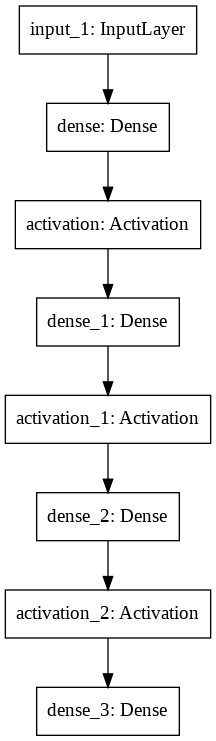

In [ ]:
import tensorflow as tf
# 모델을 준비합니다. 

# functional
X = tf.keras.layers.Input(shape=[13])
H = tf.keras.layers.Dense(5)(X)
H = tf.keras.layers.Activation('swish')(H)
H = tf.keras.layers.Dense(3)(H)
H = tf.keras.layers.Activation('swish')(H)
H = tf.keras.layers.Dense(3)(H)
H = tf.keras.layers.Activation('swish')(H)
Y = tf.keras.layers.Dense(1)(H)

model = tf.keras.models.Model(X, Y)
model.compile(optimizer='rmsprop', loss='mse')

tf.keras.utils.plot_model(model)

In [ ]:
model.fit(x_train, y_train, epochs=500, batch_size=128, shuffle=True, validation_split=0.2)

Epoch 1/500
3/3 [==============================] - 0s 94ms/step - loss: 23.0431 - val_loss: 22.6499
Epoch 2/500
3/3 [==============================] - 0s 13ms/step - loss: 21.5743 - val_loss: 21.7946
Epoch 3/500
3/3 [==============================] - 0s 13ms/step - loss: 21.5645 - val_loss: 19.6764
Epoch 4/500
3/3 [==============================] - 0s 15ms/step - loss: 21.7677 - val_loss: 18.2998
Epoch 5/500
3/3 [==============================] - 0s 13ms/step - loss: 22.4758 - val_loss: 18.5489
Epoch 6/500
3/3 [==============================] - 0s 16ms/step - loss: 21.8181 - val_loss: 19.4284
Epoch 7/500
3/3 [==============================] - 0s 15ms/step - loss: 21.6810 - val_loss: 34.8777
Epoch 8/500
3/3 [==============================] - 0s 14ms/step - loss: 22.3286 - val_loss: 28.1830
Epoch 9/500
3/3 [==============================] - 0s 18ms/step - loss: 21.6298 - val_loss: 28.1714
Epoch 10/500
3/3 [==============================] - 0s 16ms/step - loss: 21.5304 - val_loss: 31.5930

In [ ]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 20.8662


20.86615562438965

*   train_loss: 16.4878
*   val_loss: 12.5800
*   test_loss: 20.8662

## 4.2 mnist

In [ ]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


5


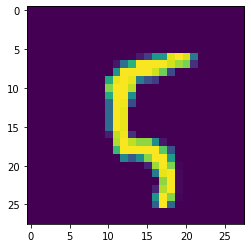

In [ ]:
import matplotlib.pyplot as plt

print(y_train[100])
plt.imshow(x_train[100])

In [ ]:
# 위에 픽셀 한칸마다 숫자가 들어가 있어서 이렇게 표현돼

print(x_train[100])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   2  18  46 136 136
  244 255 241 103   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  15  94 163 253 253 253 253
  238 218 204  35   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 131 253 253 253 25

In [ ]:
# 위의 28 * 28 = 784개의 숫자를 각각 컬럼으로 만들어서 60000장의 이미지를 표의 데이터로 바꿔줌

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [ ]:
# 종속변수를 원핫인코딩

import pandas as pd
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


In [ ]:
y_train.head()

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


In [ ]:
# model 만들기

X = tf.keras.layers.Input(shape=[784])
Y = tf.keras.layers.Dense(10, activation='softmax')(X)
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=128, shuffle=True, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 4ms/step - loss: 3.4474 - accuracy: 0.8860 - val_loss: 5.2886 - val_accuracy: 0.8334
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 3.3977 - accuracy: 0.8865 - val_loss: 3.5854 - val_accuracy: 0.8892
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 3.3652 - accuracy: 0.8880 - val_loss: 5.1313 - val_accuracy: 0.8539
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 3.3428 - accuracy: 0.8879 - val_loss: 3.7687 - val_accuracy: 0.8852
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 3.3095 - accuracy: 0.8874 - val_loss: 3.1273 - val_accuracy: 0.9077
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 3.2384 - accuracy: 0.8878 - val_loss: 3.6871 - val_accuracy: 0.8921
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 3.2750 - accuracy: 0.8889 - val_loss: 3.8198 - val_accuracy: 0.8887
Epoch 

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 3.9814 - accuracy: 0.8797


[3.9813530445098877, 0.8797000050544739]